In [1]:
import numpy as np
import matplotlib.pyplot as plt
from utils import *
from A_NC import *

0-th round
average train loss 2.29 | test loss 2.28 | test acc: 0.130
1-th round
average train loss 2.19 | test loss 2.17 | test acc: 0.521
2-th round
average train loss 1.52 | test loss 1.17 | test acc: 0.742
3-th round
average train loss 0.991 | test loss 0.69 | test acc: 0.818
4-th round
average train loss 0.698 | test loss 0.492 | test acc: 0.870
5-th round
average train loss 0.586 | test loss 0.387 | test acc: 0.898
6-th round
average train loss 0.463 | test loss 0.329 | test acc: 0.909
7-th round
average train loss 0.455 | test loss 0.292 | test acc: 0.920
8-th round
average train loss 0.378 | test loss 0.255 | test acc: 0.926
9-th round
average train loss 0.317 | test loss 0.235 | test acc: 0.931
[0.021848, 0.02027, 0.020793, 0.018671, 0.020131, 0.018555, 0.019607, 0.019629, 0.020796, 0.018636, 0.020631, 0.019845, 0.020866, 0.018653, 0.017959, 0.018219, 0.019684, 0.018842, 0.020298, 0.016769, 0.019208, 0.017306, 0.018531, 0.018055, 0.017198, 0.018142, 0.017858, 0.017942, 0.02019

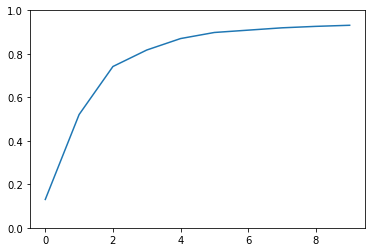

In [2]:
# IID case: all the clients have images of all the classes
# Grid graph topology: each client is connected to exactly 4 neighbours

# Hyperparameters

num_clients = 100
num_rounds = 10
epochs = 1
batch_size = 32

# Communication matrix

comm_matrix = create_mixing_matrix('grid', num_clients)

# Creating decentralized datasets

train_loader, test_loader = load_data(batch_size, num_clients)

# Instantiate models and optimizers and run decentralized training

global_model, client_models, accs = run(train_loader, test_loader, comm_matrix, num_rounds, epochs, num_clients)

cons = consensus(global_model, client_models)
print(cons)

axes = plt.gca()
axes.set_ylim([0,1])
plt.plot(range(num_rounds), accs)
plt.show()

In [3]:
# IID case: all the clients have images of all the classes
# Grid graph topology: each client is connected to exactly 4 neighbours

# Hyperparameters

num_clients = 100
num_rounds = 10
num_runs = 10
epochs = 1
batch_size = 32

# Communication matrix

comm_matrix = create_mixing_matrix('grid', num_clients)

# Creating decentralized datasets

train_loader, test_loader = load_data(batch_size, num_clients)

# Instantiate models and optimizers and run decentralized training

global_model_list = []
client_models_list = []

for p in range(num_runs):
    print("%d-th run" % p)
    _, client_models, _ = run(train_loader, test_loader, comm_matrix, num_rounds, epochs, num_clients)
    #global_model_list.append(list(global_model.state_dict().values()))
    client_models_list.append([list(client.state_dict().values()) for client in client_models])

avg_global_model = Net().cuda()

avg_client_models = [Net().cuda() for _ in range(num_clients)]
avg_client_models_list = np.array(client_models_list).mean(0)

for i in range (num_clients):
    client = avg_client_models[i]
    client_dict = client.state_dict()
    j = 0
    for k in client_dict.keys():
        client_dict[k] = avg_client_models_list[i][j]
        j += 1
    client.load_state_dict(client_dict)
 
average_models(avg_global_model, avg_client_models)

test_loss, acc = evaluate(avg_global_model, test_loader)

print('final round')
print('test loss %0.3g | test acc: %0.3f' % (test_loss, acc))

cons = consensus(avg_global_model, avg_client_models)
print("Consensus values: ", cons)
print("Mean consensus value: ", np.array(cons).mean())

0-th run
0-th round
average train loss 2.25 | test loss 2.24 | test acc: 0.479
1-th round
average train loss 1.68 | test loss 1.41 | test acc: 0.724
2-th round
average train loss 1.05 | test loss 0.774 | test acc: 0.800
3-th round
average train loss 0.749 | test loss 0.507 | test acc: 0.866
4-th round
average train loss 0.657 | test loss 0.401 | test acc: 0.894
5-th round
average train loss 0.473 | test loss 0.329 | test acc: 0.909
6-th round
average train loss 0.444 | test loss 0.284 | test acc: 0.919
7-th round
average train loss 0.395 | test loss 0.256 | test acc: 0.926
8-th round
average train loss 0.347 | test loss 0.229 | test acc: 0.934
9-th round
average train loss 0.292 | test loss 0.211 | test acc: 0.938
1-th run
0-th round
average train loss 2.25 | test loss 2.25 | test acc: 0.444
1-th round
average train loss 1.73 | test loss 1.45 | test acc: 0.734
2-th round
average train loss 1.09 | test loss 0.764 | test acc: 0.821
3-th round
average train loss 0.756 | test loss 0.533 | 